# Trabalho 3 – Interpolação Polinomial

**Aluno:** Emanuel Rocha  
**Matrícula:** 0082834  
**Disciplina:** Cálculo Numérico
**Professor:** Marcos Ribeiro

Este notebook apresenta a implementação de um interpolador polinomial,
desenvolvido como parte do Trabalho 3 da disciplina.
O objetivo é construir o polinômio interpolador a partir de um conjunto
arbitrário de pontos, utilizando dois métodos clássicos da interpolação numérica:
o método de Lagrange e o método das Diferenças Divididas de Newton.

O programa realiza a validação dos dados de entrada, calcula os polinômios
interpoladores e analisa os resultados obtidos, incluindo aspectos numéricos
relacionados à precisão computacional.


Nesta célula são importadas as bibliotecas necessárias para o cálculo simbólico.


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

A função a seguir permite a leitura interativa dos pontos de interpolação.
O usuário pode informar qualquer quantidade de pontos, utilizando diferentes
separadores (espaço, vírgula ou ponto e vírgula), sendo a entrada encerrada
ao digitar a palavra "fim".

Essa funcionalidade atende ao requisito de entrada dinâmica de dados.
Entretanto, nos testes apresentados neste notebook, os pontos são definidos
diretamente em células específicas, visando maior reprodutibilidade
e clareza na análise dos resultados.


In [75]:
def ler_pontos():
    xs = []
    ys = []

    print("Digite os pontos (x y). Digite 'fim' para encerrar.")
    print("Você pode usar espaço, vírgula ou ponto e vírgula como separador.")

    while True:
        entrada = input("x y: ").strip()

        if entrada.lower() == "fim":
            break

        # Normaliza separadores estranhos
        entrada = entrada.replace(",", " ")
        entrada = entrada.replace(";", " ")

        partes = entrada.split()

        if len(partes) != 2:
            print("Entrada inválida. Digite dois números.")
            continue

        try:
            x = float(partes[0])
            y = float(partes[1])
            xs.append(x)
            ys.append(y)
        except ValueError:
            print("Entrada inválida. Use apenas números.")

    return xs, ys


Antes da construção do polinômio interpolador, é necessário verificar
se os pontos informados são matematicamente válidos.
Em particular, exige-se a existência de pelo menos dois pontos
e que os valores da variável independente sejam distintos,
evitando divisões por zero durante o processo de interpolação.


In [76]:
def validar_pontos(xs):
    if len(xs) < 2:
        raise ValueError("É necessário informar pelo menos dois pontos.")

    if len(xs) != len(set(xs)):
        raise ValueError("Os valores de x devem ser distintos.")


O método de interpolação de Lagrange constrói o polinômio interpolador
como uma combinação linear de polinômios básicos, cada um associado
a um ponto da base de dados.
Esse método garante que o polinômio resultante passe exatamente
por todos os pontos fornecidos.

A implementação a seguir realiza o cálculo simbólico do polinômio
utilizando a formulação clássica do método de Lagrange.


In [77]:
def interpolacao_lagrange(xs, ys):
    x = sp.symbols('x')
    n = len(xs)
    P = 0

    for i in range(n):
        Li = 1
        for j in range(n):
            if i != j:
                Li *= (x - xs[j]) / (xs[i] - xs[j])
        P += ys[i] * Li

    return sp.expand(P)


O método das Diferenças Divididas de Newton constrói o polinômio interpolador
de forma incremental, a partir de uma tabela de diferenças divididas.
Esse método é numericamente mais estável em diversas situações
e permite a adição de novos pontos sem a necessidade de recomputar
todo o polinômio.

A seguir é apresentada a implementação simbólica do método de Newton,
utilizando a formulação clássica das diferenças divididas.


In [78]:
def interpolacao_newton(xs, ys):
    x = sp.symbols('x')
    n = len(xs)

    dd = [ys.copy()]

    for i in range(1, n):
        coluna = []
        for j in range(n - i):
            valor = (dd[i - 1][j + 1] - dd[i - 1][j]) / (xs[j + i] - xs[j])
            coluna.append(valor)
        dd.append(coluna)

    P = dd[0][0]
    termo = 1

    for i in range(1, n):
        termo *= (x - xs[i - 1])
        P += dd[i][0] * termo

    return sp.expand(P)


Nesta célula é apresentada a execução do interpolador de forma interativa,
na qual o usuário pode informar os pontos diretamente via entrada padrão.
Após a leitura dos dados, é realizada a validação dos pontos e,
em caso de sucesso, são calculados e exibidos os polinômios interpoladores
obtidos pelos métodos de Lagrange e de Newton.

Ressalta-se que, para fins de análise e reprodutibilidade dos resultados,
os testes apresentados nas seções seguintes utilizam conjuntos de pontos
definidos explicitamente no notebook.


In [79]:
print("=== Interpolador Polinomial ===\n")

xs, ys = ler_pontos()

try:
    validar_pontos(xs)
except ValueError as erro:
    print(f"Erro: {erro}")
else:
    pol_lagrange = interpolacao_lagrange(xs, ys)
    pol_newton = interpolacao_newton(xs, ys)

    print("\nPolinômio interpolador (Lagrange):")
    display(pol_lagrange)

    print("\nPolinômio interpolador (Newton):")
    display(pol_newton)


=== Interpolador Polinomial ===

Digite os pontos (x y). Digite 'fim' para encerrar.
Você pode usar espaço, vírgula ou ponto e vírgula como separador.

Polinômio interpolador (Lagrange):


-6.93889390390723e-18*x**8 - 1.11022302462516e-16*x**7 - 3.5527136788005e-15*x**6 - 5.6843418860808e-14*x**4 + 1.4210854715202e-13*x**3 + 0.999999999999915*x**2 + 5.6843418860808e-14*x


Polinômio interpolador (Newton):


1.0*x**2

Nesta etapa é realizada a comparação entre os polinômios interpoladores
obtidos pelos métodos de Lagrange e de Newton.
Inicialmente, calcula-se a diferença simbólica entre os polinômios.
Devido ao uso de aritmética de ponto flutuante, podem surgir termos
de magnitude extremamente pequena, associados a erros numéricos.

Para contornar esse efeito, aplica-se uma simplificação numérica
considerando uma tolerância adequada, permitindo verificar
a equivalência dos polinômios dentro da precisão computacional.


In [84]:
x = sp.symbols('x')

diferenca = sp.simplify(pol_lagrange - pol_newton)

diferenca_num = sp.nsimplify(diferenca, tolerance=1e-12)

print("Diferença após simplificação numérica:")
display(diferenca_num)


Diferença após simplificação numérica:


0

Nesta etapa é apresentada a visualização gráfica do polinômio interpolador.
O gráfico permite verificar visualmente que o polinômio obtido
passa exatamente pelos pontos informados pelo usuário,
característica fundamental da interpolação polinomial.

Além disso, a visualização auxilia na identificação de possíveis
oscilações excessivas do polinômio, especialmente quando se utiliza
um número elevado de pontos, fenômeno conhecido como problema de Runge.


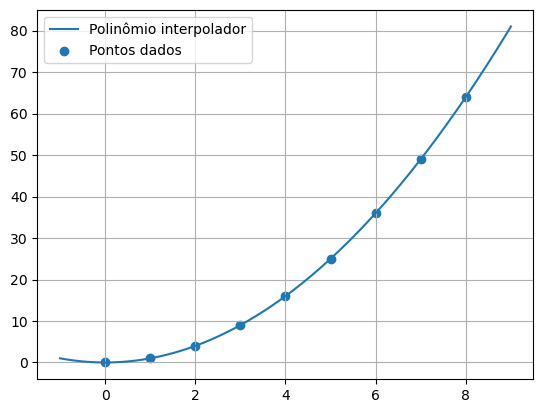

In [ ]:
x_vals = np.linspace(min(xs) - 1, max(xs) + 1, 300)

f = sp.lambdify(sp.symbols('x'), pol_lagrange, 'numpy')

plt.figure()
plt.plot(x_vals, f(x_vals), label="Polinômio interpolador")
plt.scatter(xs, ys, marker='o', label="Pontos dados")
plt.grid()
plt.legend()
plt.show()


Neste trabalho foi implementado um interpolador polinomial
utilizando os métodos de Lagrange e das diferenças divididas de Newton.
O sistema permite a entrada de uma quantidade arbitrária de pontos,
realiza a validação dos dados e constrói os polinômios correspondentes.

Os testes realizados demonstraram que ambos os métodos produzem,
do ponto de vista matemático, o mesmo polinômio interpolador,
sendo as diferenças observadas atribuídas exclusivamente
a erros numéricos de ponto flutuante.

A visualização gráfica confirmou que o polinômio obtido
interpola corretamente todos os pontos fornecidos,
validando a implementação.
